# BLACK FRIDAY SALES 

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# load dataset
df=pd.read_csv('train.csv')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.shape

(550068, 12)

In [8]:
cols = ['Stay_In_Current_City_Years']

for col in cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('+', '', regex=False)   # remove thousand separators
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum().mean()

np.float64(46407.083333333336)

In [13]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [14]:
df.isnull().sum().mean()

np.float64(0.0)

In [15]:
df.shape

(550068, 10)

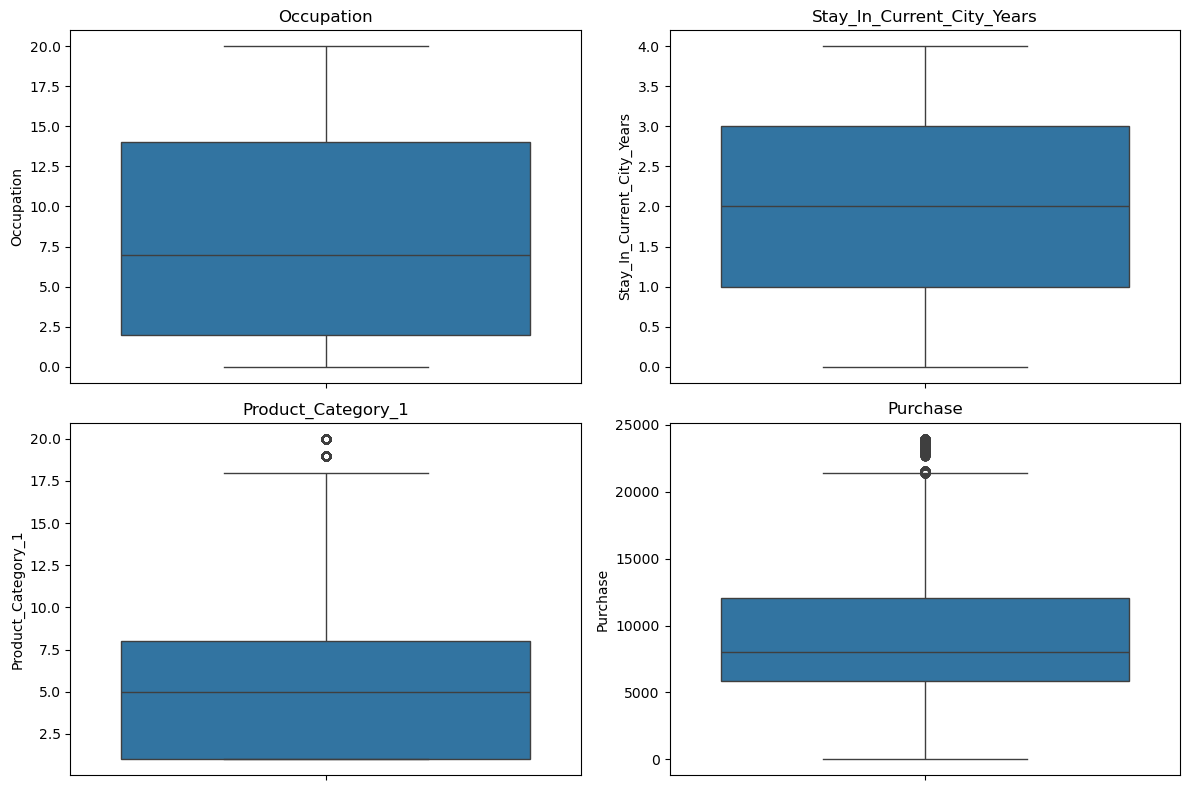

In [16]:
cols = ['Occupation','Stay_In_Current_City_Years','Product_Category_1','Purchase']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [18]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [19]:
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,23961.000000


In [20]:
df.sort_values(by='Purchase',ascending=False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,23958


In [21]:
df.sort_values(by='Stay_In_Current_City_Years',ascending=False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
550067,1006039,P00371644,F,46-50,0,B,4,1,20,490
121015,1000710,P00128042,M,26-35,20,A,4,0,1,11431
121013,1000710,P00205842,M,26-35,20,A,4,0,5,5139
121012,1000710,P00074242,M,26-35,20,A,4,0,5,6883
121011,1000710,P00109242,M,26-35,20,A,4,0,6,16517
121010,1000710,P00082242,M,26-35,20,A,4,0,11,4629
121009,1000710,P00243942,M,26-35,20,A,4,0,1,15276
121008,1000710,P00355142,M,26-35,20,A,4,0,1,15384
121007,1000710,P00204242,M,26-35,20,A,4,0,6,16499
121006,1000710,P00036442,M,26-35,20,A,4,0,16,16344


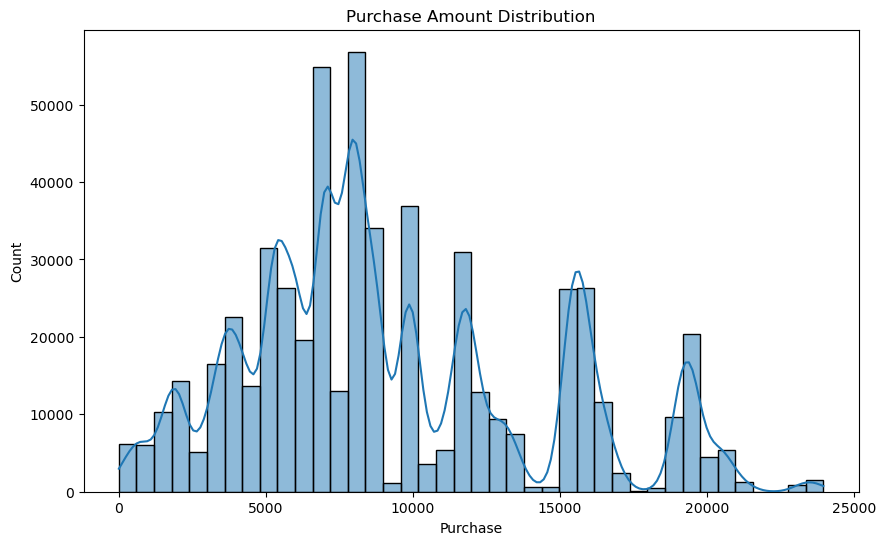

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Purchase'], bins=40, kde=True)
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase")
plt.show()

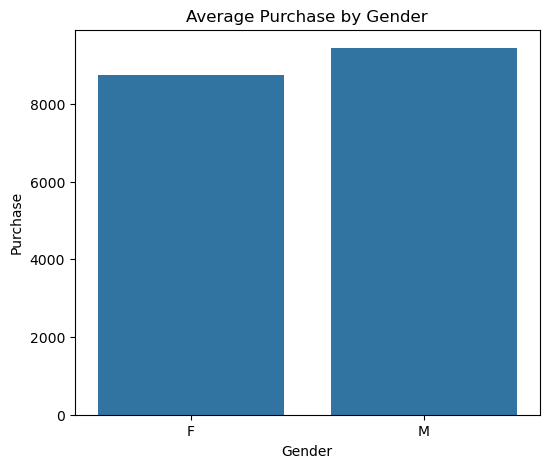

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Purchase', data=df,errorbar=None)
plt.title("Average Purchase by Gender")
plt.show()

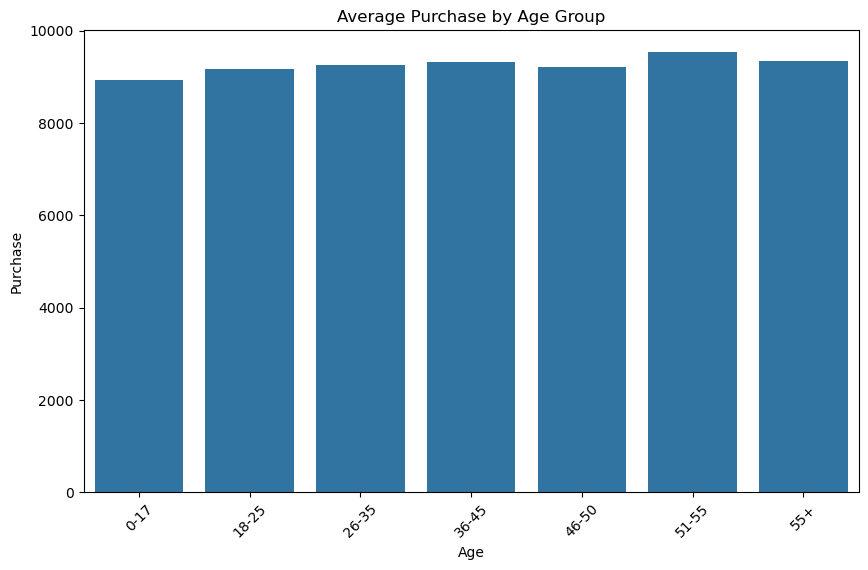

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Purchase', data=df, order=sorted(df['Age'].unique()),errorbar=None)
plt.title("Average Purchase by Age Group")
plt.xticks(rotation=45)
plt.show()

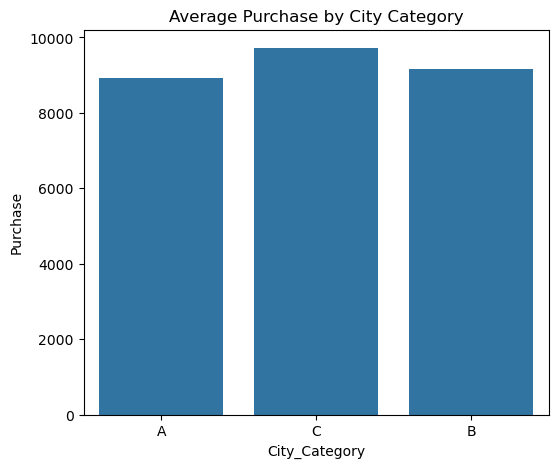

In [25]:
plt.figure(figsize=(6,5))
sns.barplot(x='City_Category', y='Purchase', data=df,errorbar=None)
plt.title("Average Purchase by City Category")
plt.show()

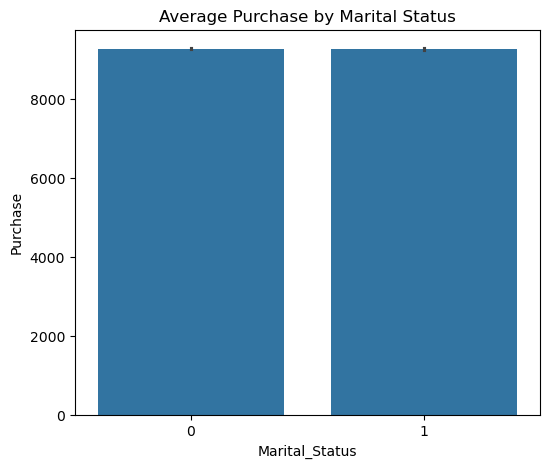

In [26]:
plt.figure(figsize=(6,5))
sns.barplot(x='Marital_Status', y='Purchase', data=df)
plt.title("Average Purchase by Marital Status")
plt.show()

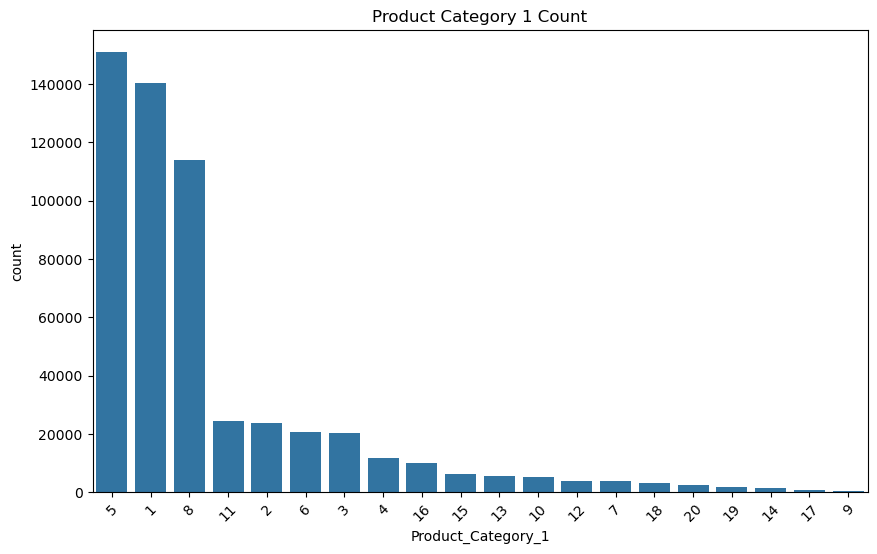

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product_Category_1', data=df,
              order=df['Product_Category_1'].value_counts().index)
plt.title("Product Category 1 Count")
plt.xticks(rotation=45)
plt.show()

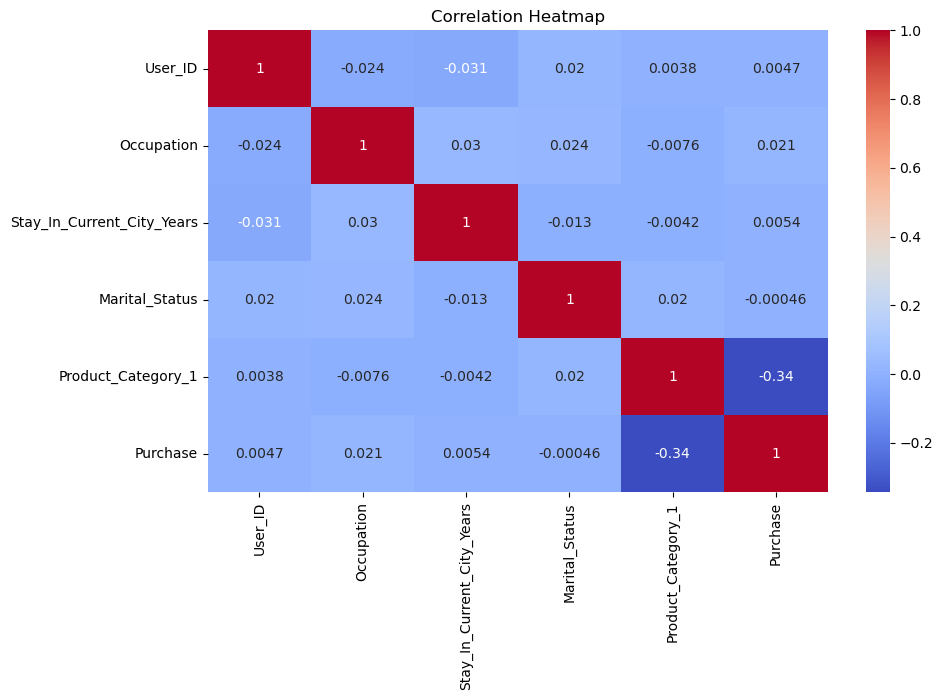

In [28]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

🔎 Correlation Summary
	•	Most variables show very weak or near-zero correlations with each other.
	•	Purchase has:
	•	A moderate negative correlation with Product_Category_1 (-0.34) → Customers purchasing from this category tend to have lower overall purchase values (or vice versa).
	•	Almost no correlation with:
	•	Occupation (0.021)
	•	Stay_In_Current_City_Years (0.005)
	•	Marital_Status (-0.0004)
	•	User_ID (0.0047)
	•	Other features are also weakly correlated with each other (all values close to 0).

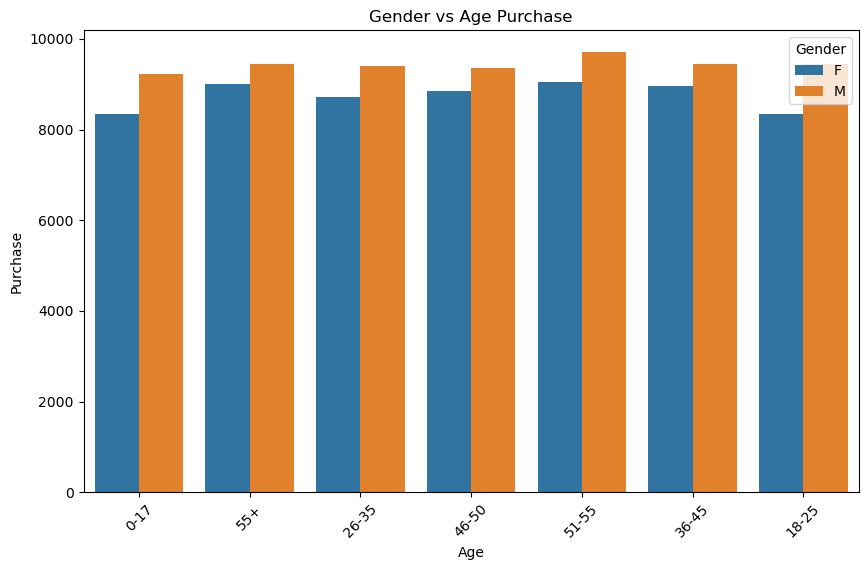

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df,errorbar=None)
plt.title("Gender vs Age Purchase")
plt.xticks(rotation=45)
plt.show()